In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

### Setting Up GPU as a training device

In [12]:
physical_devices = tf.config.list_physical_devices()

print(physical_devices)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
tf.config.set_visible_devices(physical_devices[1], 'GPU')

### Loading Data

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Getting dummy variables
y_train_fixed = np.zeros((y_train.shape[0], 10))
y_test_fixed = np.zeros((y_test.shape[0], 10))

i = 0
for [val] in y_train:
  y_train_fixed[i][val] = 1
  i += 1
  
i = 0
for [val] in y_test:
  y_test_fixed[i][val] = 1
  i += 1

### Setting up the model

*I found such example on stackExchange:*

```py
model = Sequential()
model.add(Conv2D(input_shape=trainX[0,:,:,:].shape, filters=32, 
                 use_bias=True, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64, use_bias=False, kernel_size=(5,5), strides=2))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
```

In [15]:
num_classes = 10

model = keras.Sequential(
  [
    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation="relu"),
    layers.Dropout(0.1),
    layers.Conv2D(32, kernel_size=(3, 3), use_bias=False, padding='same', strides=2, activation="relu"),
    layers.Dropout(0.2),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation="softmax"),
  ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9216      
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                      

In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Training model

In [17]:
%%time
batch_size = 256 # Training data will be split in chunks of this size that will be passed through the network at the same time
epochs = 80 # During one epoch the model 'sees' all of the training data, with this parameter we determine how many times the model will be allowed to see them
validation_split = 0.1 # Determines what percentage of training data will be used to validate the model after each epoch
history = model.fit(x_train, y_train_fixed, batch_size=batch_size, epochs=epochs, validation_split=validation_split)

Epoch 1/80
176/176 [==============================] - 3s 13ms/step - loss: 4.2177 - accuracy: 0.1270 - val_loss: 2.1148 - val_accuracy: 0.1854
Epoch 2/80
176/176 [==============================] - 2s 12ms/step - loss: 2.0983 - accuracy: 0.1938 - val_loss: 1.9056 - val_accuracy: 0.2716
Epoch 3/80
176/176 [==============================] - 2s 12ms/step - loss: 1.9631 - accuracy: 0.2508 - val_loss: 1.7337 - val_accuracy: 0.3436
Epoch 4/80
176/176 [==============================] - 2s 12ms/step - loss: 1.8242 - accuracy: 0.3082 - val_loss: 1.6258 - val_accuracy: 0.4020
Epoch 5/80
176/176 [==============================] - 2s 12ms/step - loss: 1.7329 - accuracy: 0.3485 - val_loss: 1.5310 - val_accuracy: 0.4520
Epoch 6/80
176/176 [==============================] - 2s 12ms/step - loss: 1.6591 - accuracy: 0.3817 - val_loss: 1.4774 - val_accuracy: 0.4718
Epoch 7/80
176/176 [==============================] - 2s 12ms/step - loss: 1.5920 - accuracy: 0.4116 - val_loss: 1.4128 - val_accuracy: 0.5160

Text(0.5, 1.0, 'Loss Curves')

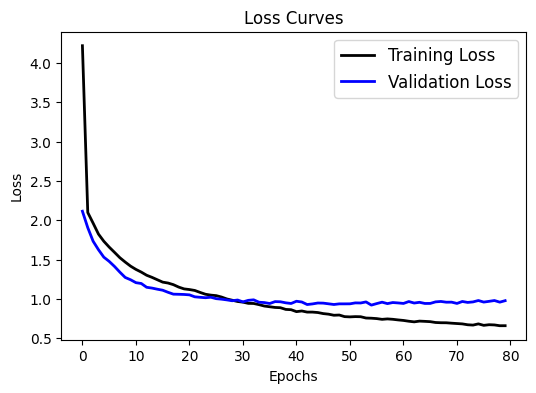

In [18]:
# Plotting the loss curve
plt.figure(figsize=[6, 4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

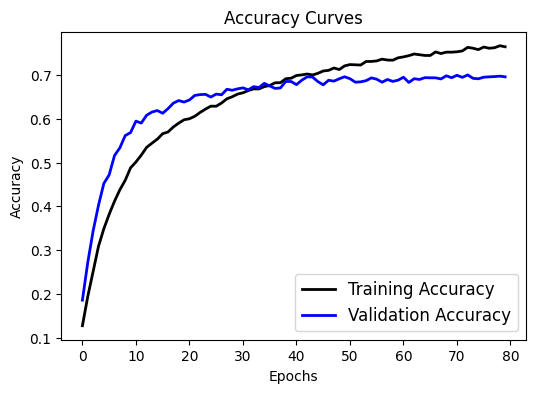

In [19]:
# Plotting the accuracy curve
plt.figure(figsize=[6, 4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)